In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

## 1. Read the data as an appropriate Time Series data and plot the data.

In [9]:
df_spark = pd.read_csv('Sparkling.csv')
df_spark.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [10]:
df_spark.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

##### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [11]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
df_spark['Time_Stamp'] = date

In [13]:
df_spark.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [14]:
df_spark.set_index(keys='Time_Stamp',drop=True,inplace=True)
df_spark.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [15]:
df_spark.drop(labels=['YearMonth'],axis=1,inplace=True)
df_spark.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [16]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [17]:
df_spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [18]:
df_spark.isnull().sum()

Sparkling    0
dtype: int64

##### Plot the Time Series to understand the behaviour of the data.

In [19]:
from pylab import rcParams

Text(0, 0.5, 'Units Sold')

<Figure size 864x432 with 0 Axes>

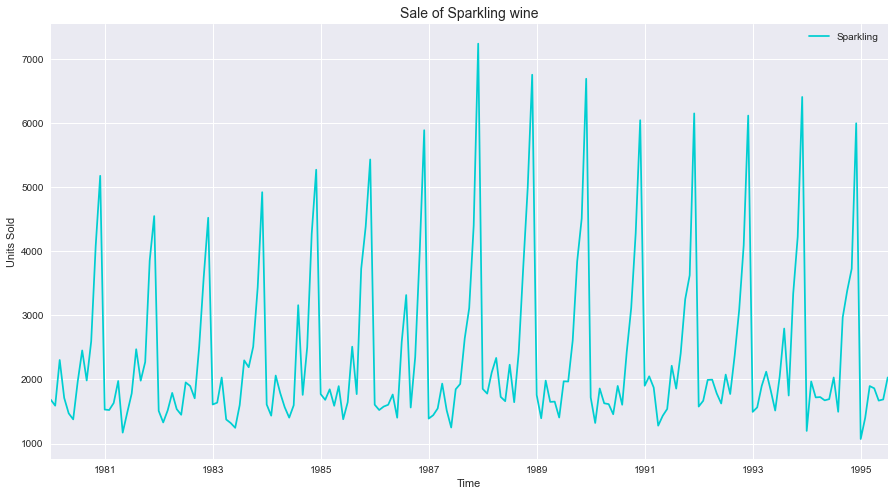

In [21]:
plt.figure(figsize = (12, 6))
df_spark.plot(color='darkturquoise')
plt.title('Sale of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

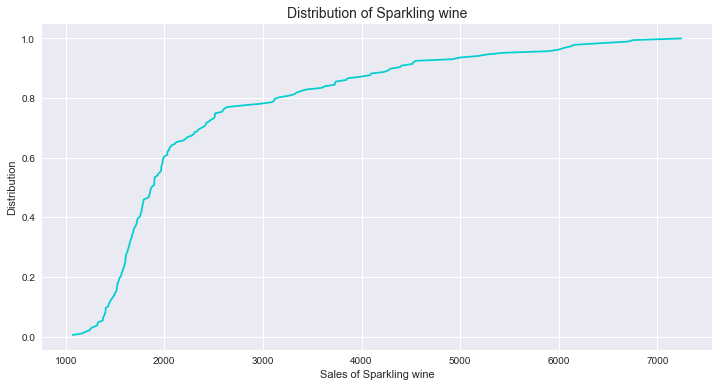

In [22]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df_spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'darkturquoise')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

##### Plot a boxplot to understand the spread of wine sales across different years and within different months across years.

###### Yearly Boxplot - Sparkling

Text(0.5, 1.0, 'Yearly Boxplot - Sparkling')

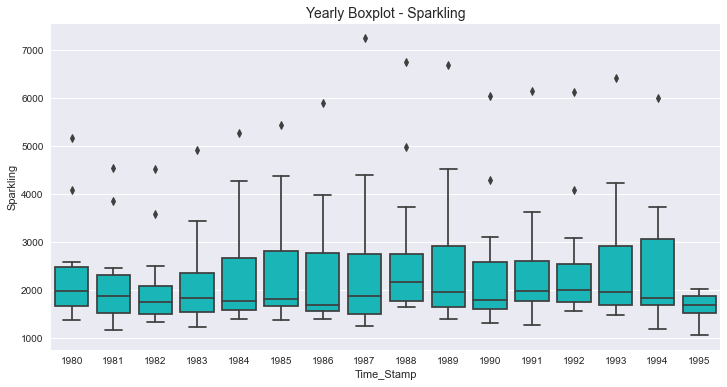

In [23]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_spark.index.year,y = df_spark['Sparkling'], color = 'darkturquoise')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)

###### Monthly BoxPlot - Sparkling

Text(0.5, 1.0, 'Monthly Boxplot - Sparkling')

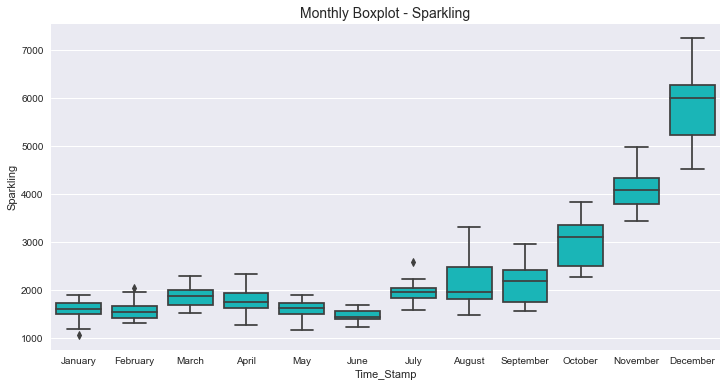

In [24]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_spark.index.month_name(),y = df_spark['Sparkling'], color = 'darkturquoise')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)

##### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

Text(0.5, 1.0, 'Sparkling - Monthly plot')

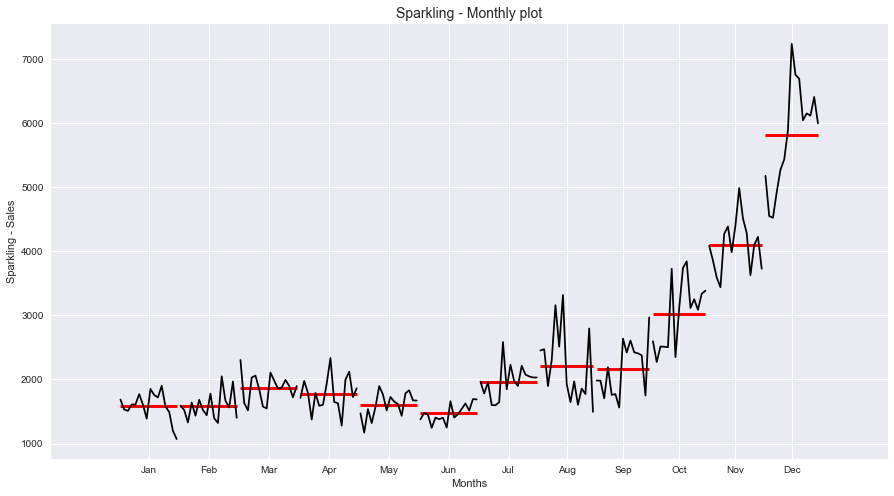

In [25]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_spark['Sparkling'],ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

###### This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

##### Plot a graph of monthly sales across years.

###### Sparkling

In [26]:
monthly_sales_across_years = pd.pivot_table(df_spark, values = 'Sparkling', columns = df_spark.index.month, index = df_spark.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

Text(0.5, 1.0, 'Sparkling - Monthly sales over years')

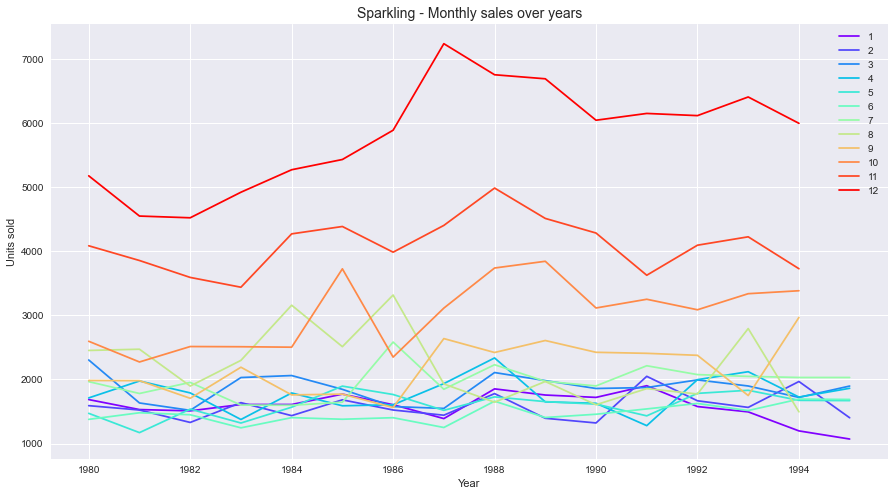

In [27]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)

##### Plot the average sales per month and the month on month percentage change of sales.

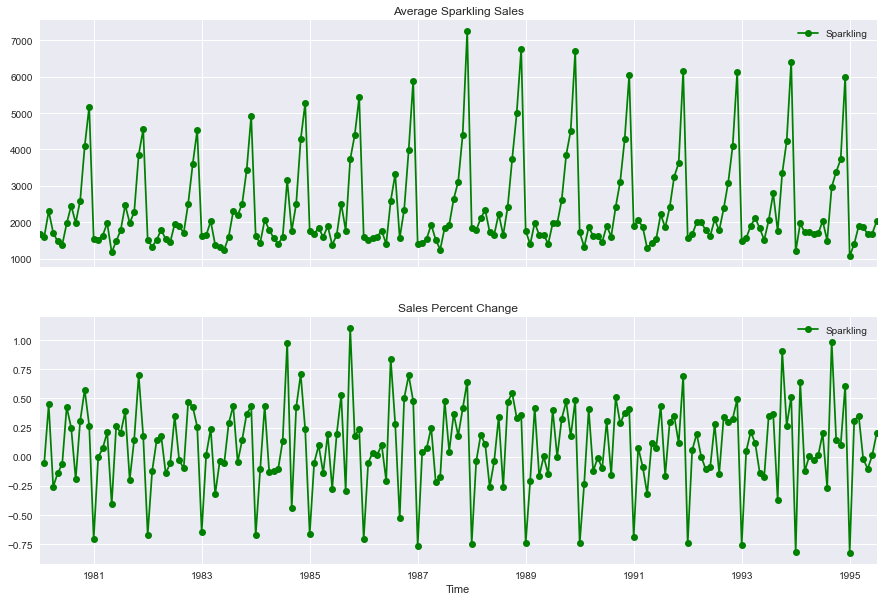

In [30]:
# group by date and get average Sparkling & Rose sales, and precent change
average_s    = df_spark.groupby(df_spark.index)['Sparkling'].mean()
pct_change_s = df_spark.groupby(df_spark.index)['Sparkling'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))

# plot average Sparkling sales over time(year-month)
ax1 = average_s.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'green')

# plot precent change for Sales over time(year-month)
ax2 = pct_change_s.plot(legend=True,ax=axis2,marker='o',color='green',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best');

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Decompose the Time Series and plot the different components.

If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [31]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

###### Additive Decomposition

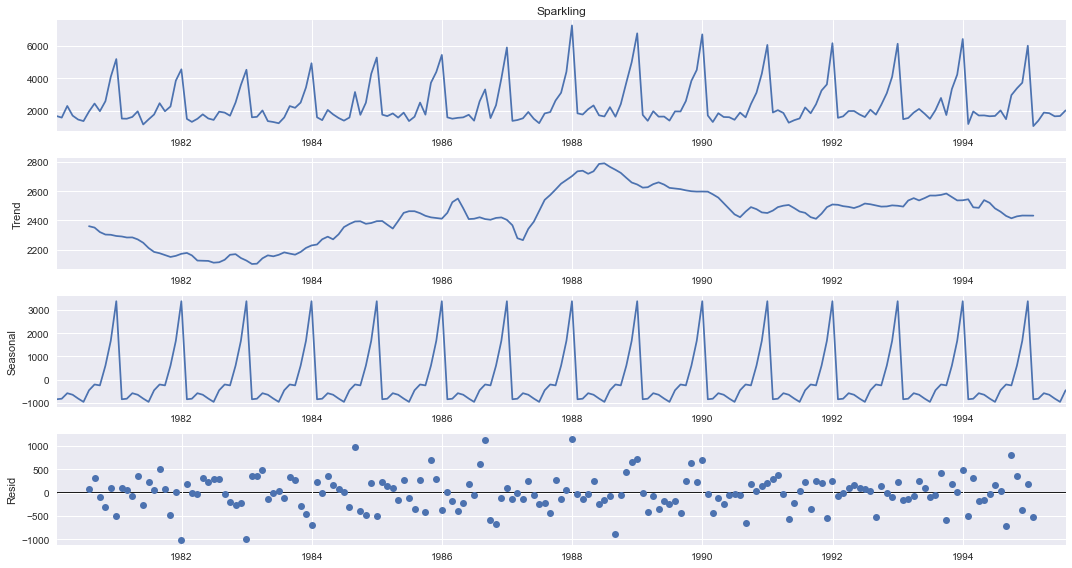

In [33]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='additive')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [37]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

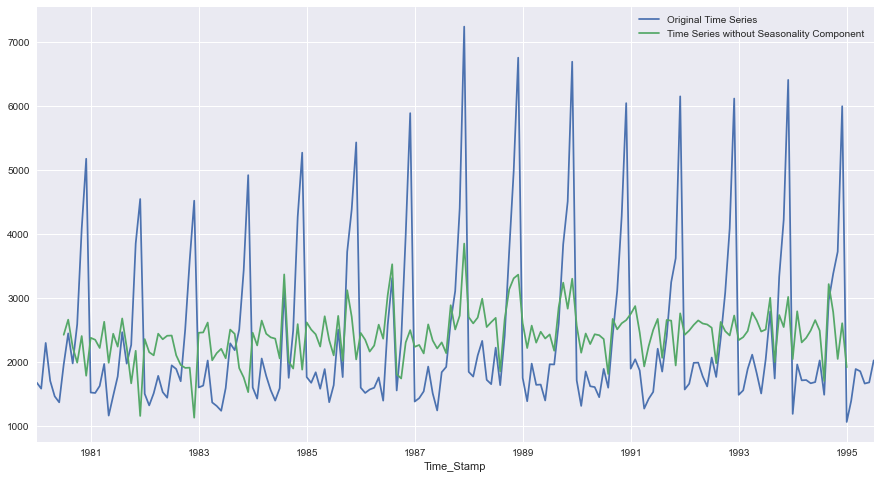

In [38]:
df_spark.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

###### Multiplicative Decomposition

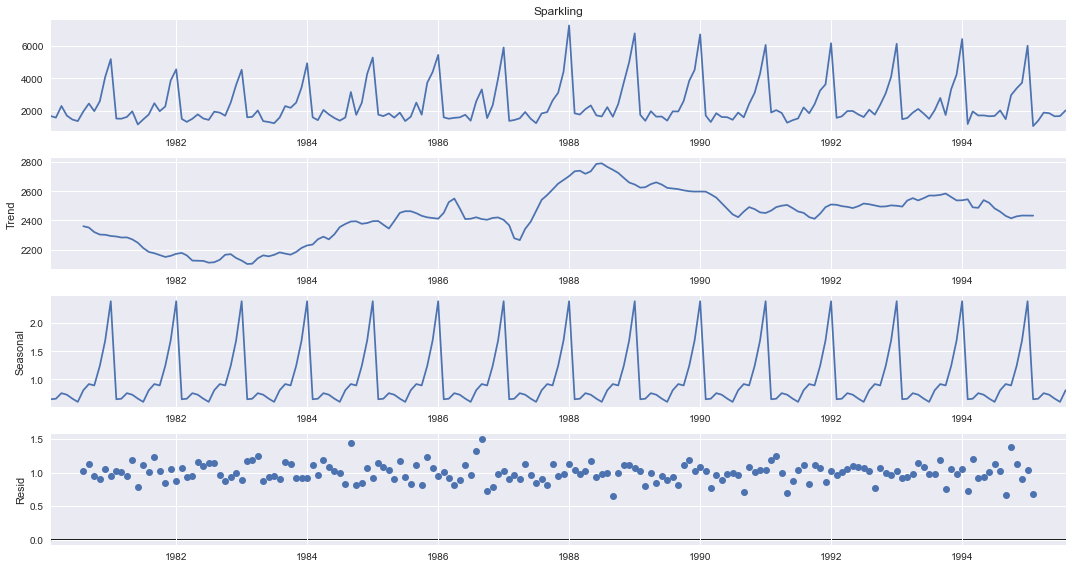

In [40]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [41]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [42]:
deaseasonalized_ts1 = trend + residual
deaseasonalized_ts1.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

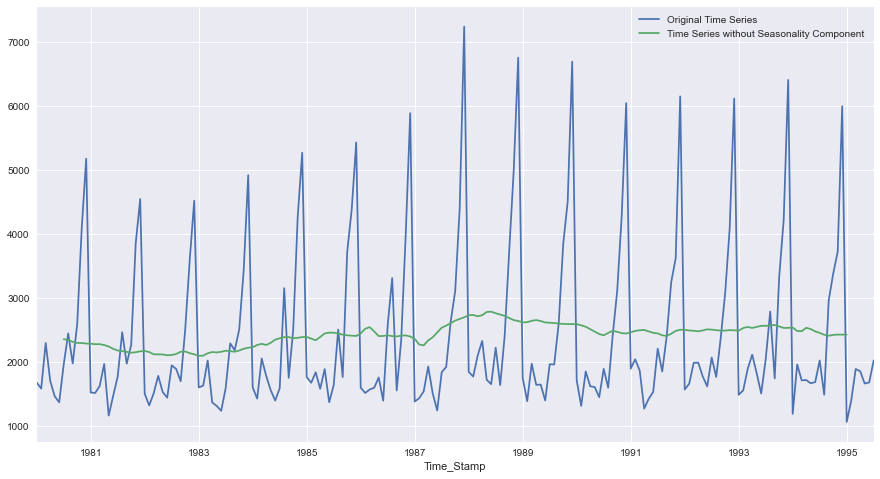

In [43]:
df_spark.plot()
deaseasonalized_ts1.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## 3. Split the data into training and test. The test data should start in 1991.

#### Split the time series

In [44]:
train=df_spark[df_spark.index.year < 1991]
test=df_spark[df_spark.index.year >= 1991]

In [45]:
from IPython.display import display

In [46]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [47]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


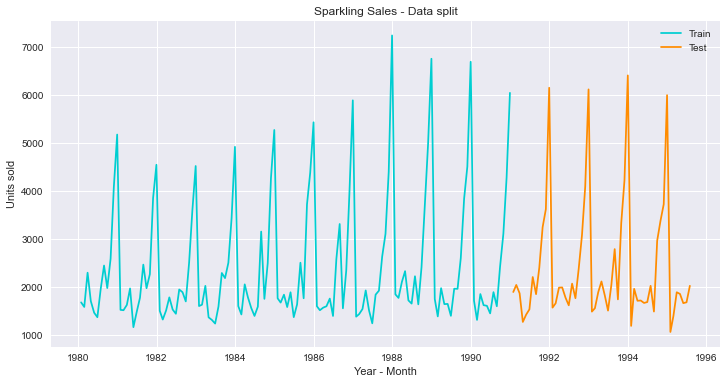

In [48]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

#### Model 1: Linear Regression

In [49]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [50]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [51]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [53]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

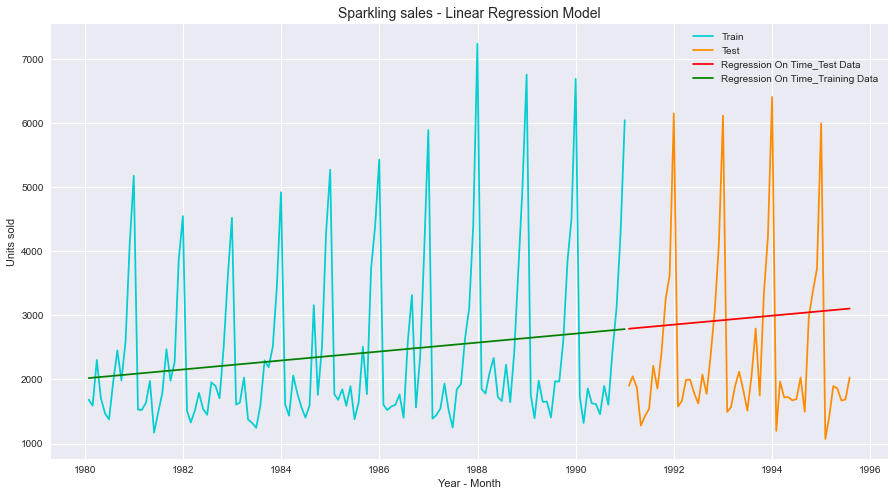

In [54]:
plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

###### LR - Model Evaluation

In [55]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [56]:
# LR Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [57]:
# LR Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [58]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

#### Model 2: Naive forecast

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [71]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

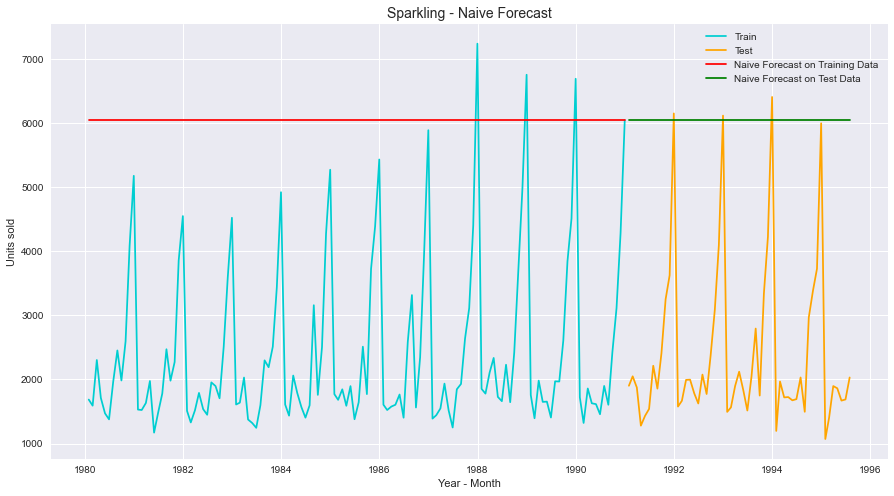

In [72]:
#plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

###### Naive Model Evauation

In [64]:
# Naive Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [65]:
# Naive Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [66]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

#### Model 3: Simple Average

In [67]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [68]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

Time_Stamp
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [73]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

Time_Stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

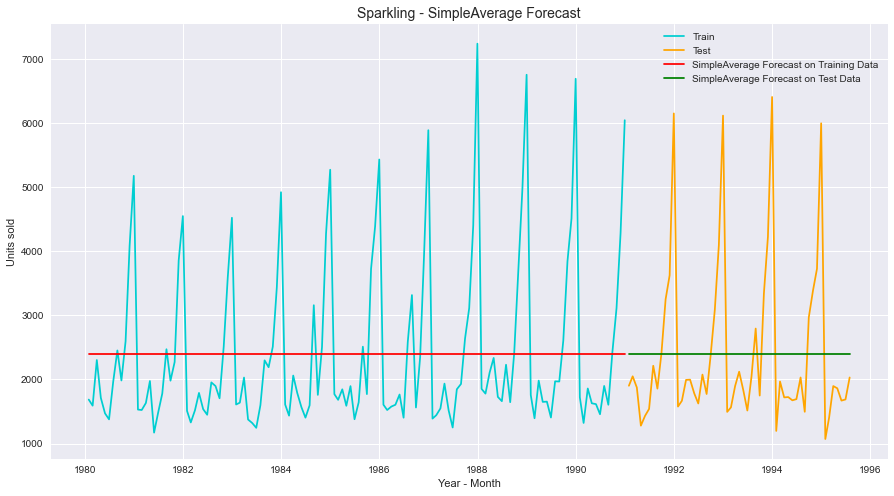

In [74]:
#plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

###### Simple Average Model Evaluation

In [75]:
## SA Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [76]:
## SA Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [77]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90

#### Model 4: Moving Average

In [80]:
MovingAverage = df_spark.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [81]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
Time_Stamp                                                                    
1980-01-31       1686               NaN               NaN               NaN   
1980-02-29       1591            1638.5               NaN               NaN   
1980-03-31       2304            1947.5               NaN               NaN   
1980-04-30       1712            2008.0           1823.25               NaN   
1980-05-31       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
Time_Stamp                    
1980-01-31               NaN  
1980-02-29               NaN  
1980-03-31               NaN  
1980-04-30               NaN  
1980-05-31               NaN

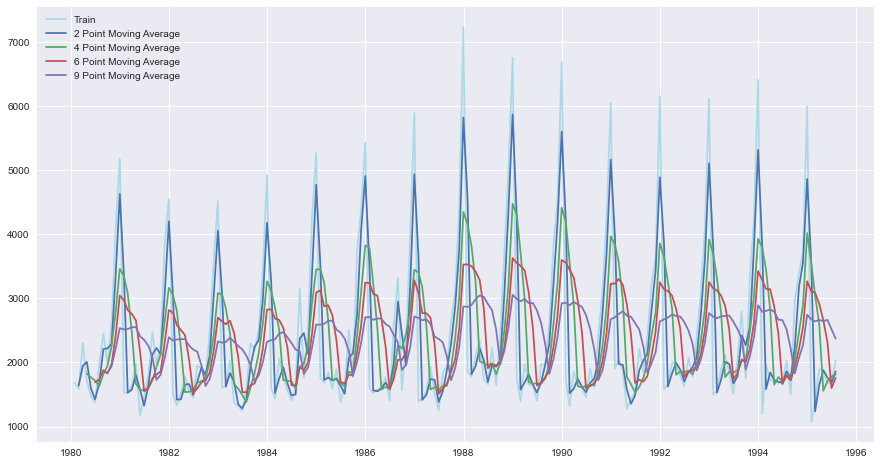

In [82]:
plt.plot(MovingAverage['Sparkling'], label='Train', color='lightblue')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [83]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

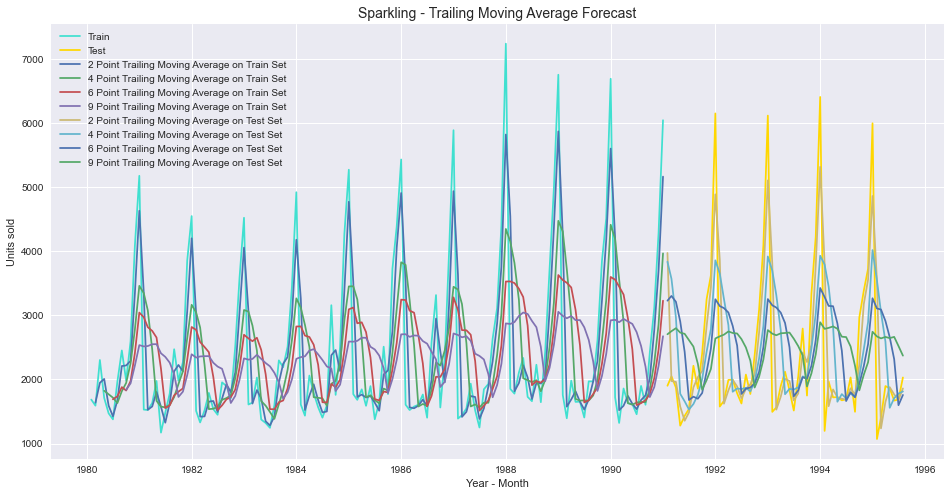

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

###### MA Model Evaluation

MA is done only on Test Data

In [86]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [87]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
SimpleAverage     1275.081804      38.90
2 point TMA        813.400684      19.70
4 point TMA       1156.589694      35.96
6 point TMA       1283.927428      43.86
9 point TMA       1346.278315      46.86

#### Model 5: Simple Exponential Smoothing

In [88]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [89]:
SES_train = train.copy()
SES_test = test.copy()

In [90]:
SES_train['Sparkling'].head()

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [91]:
SES_test['Sparkling'].head()

Time_Stamp
1991-01-31    1902
1991-02-28    2049
1991-03-31    1874
1991-04-30    1279
1991-05-31    1432
Name: Sparkling, dtype: int64

In [92]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


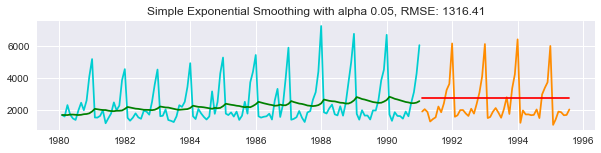

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


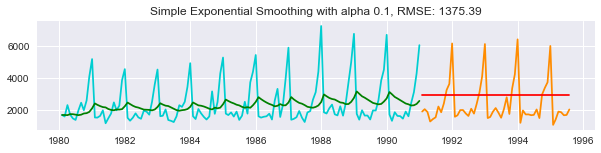

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


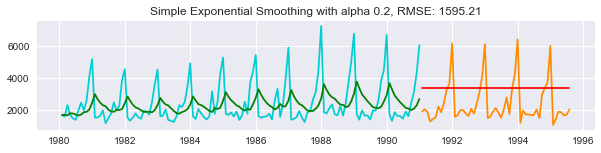

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


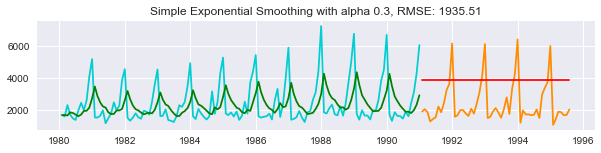

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


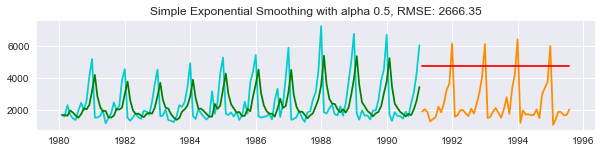

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


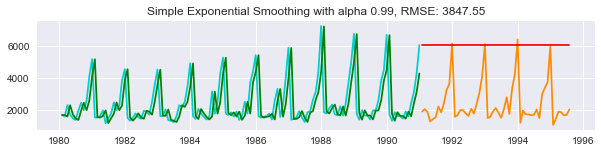

In [93]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

In [94]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [95]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling  predict_spark
Time_Stamp                          
1980-01-31       1686    1818.535750
1980-02-29       1591    1811.961001
1980-03-31       2304    1800.999709
1980-04-30       1712    1825.952226
1980-05-31       1471    1820.299357

In [97]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling  predict_spark
Time_Stamp                          
1991-01-31       1902    2724.932624
1991-02-28       2049    2724.932624
1991-03-31       1874    2724.932624
1991-04-30       1279    2724.932624
1991-05-31       1432    2724.932624

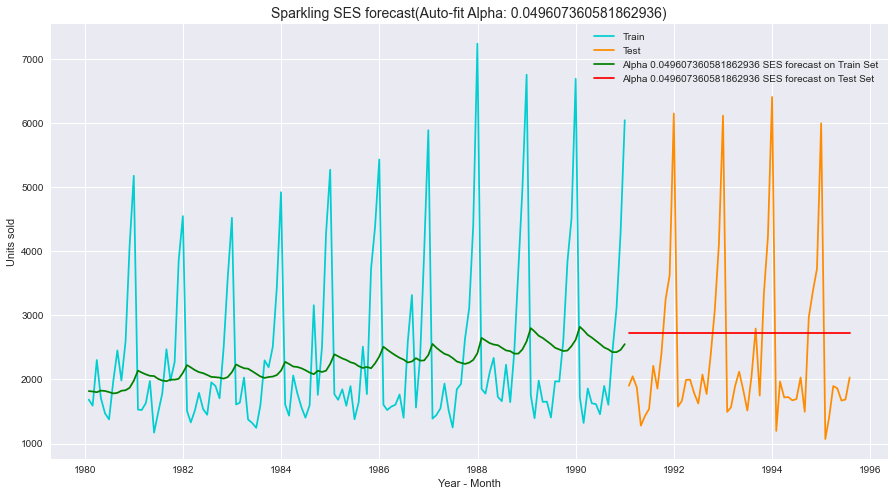

In [101]:
## Plotting on both the Training and Test data

#plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.049607360581862936 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.049607360581862936 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.049607360581862936)', fontsize = 14);

#print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

###### SES Model Evaluation

In [102]:
## SES Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1315.232 and MAPE is 39.92


In [103]:
## SES Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1316.035 and MAPE is 45.47


In [104]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.049607360581862936'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                1389.135175      50.15
NaiveModel                      3864.279352     152.87
SimpleAverage                   1275.081804      38.90
2 point TMA                      813.400684      19.70
4 point TMA                     1156.589694      35.96
6 point TMA                     1283.927428      43.86
9 point TMA                     1346.278315      46.86
SES Alpha 0.049607360581862936  1316.035487      45.47

#### Model 6: Double Exponential Smoothing (Holt's Model)

In [105]:
DES_train = train.copy()
DES_test = test.copy()

In [106]:
model_DES = Holt(DES_train['Sparkling'])

In [107]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [109]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1     1363.47       44.26    1779.42      67.23
1     0.1   0.2     1398.19       45.61    2601.54      95.50
10    0.2   0.1     1412.03       46.62    3611.77     135.41
2     0.1   0.3     1431.37       46.90    4288.43     155.25
20    0.3   0.1     1428.27       46.92    5908.19     223.50

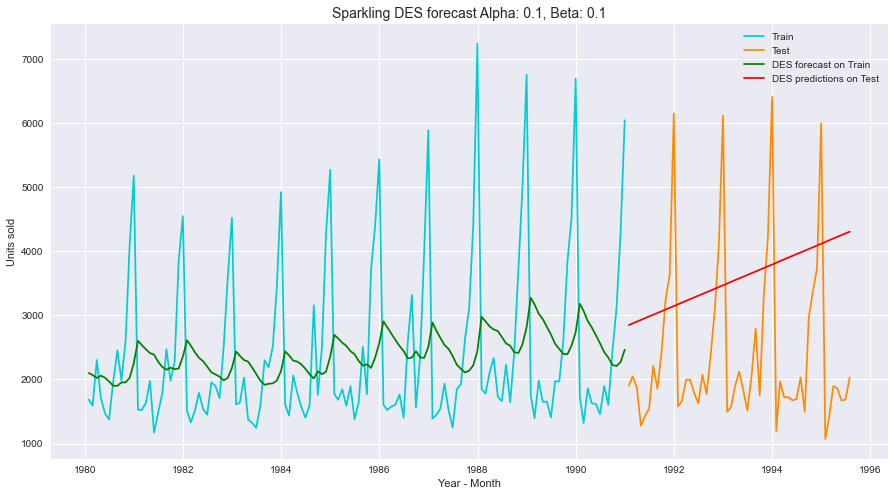

In [110]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

###### Trying auto fit by the model

In [111]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [112]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
alpha_6_1 = alpha
beta_6_1 = beta

In [115]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues

In [116]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))

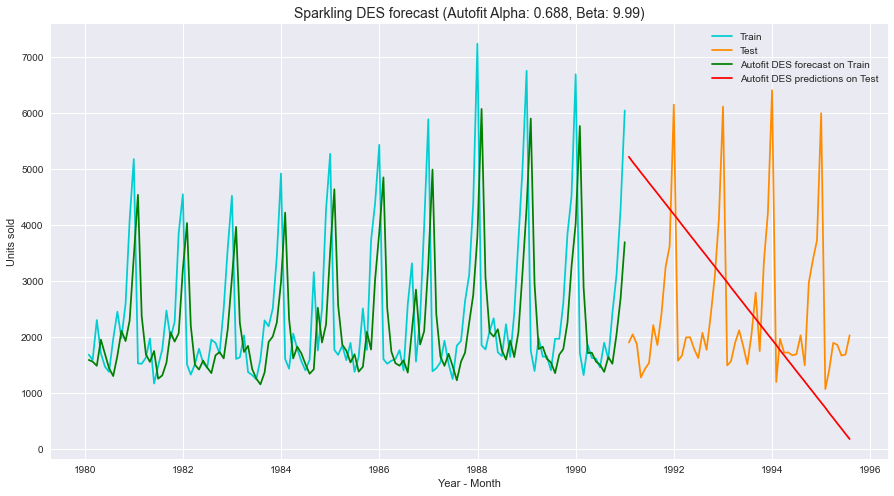

In [118]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.688, Beta: 9.99)', fontsize=14);
plt.legend(loc='best')

In [119]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [120]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

In [121]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

Alpha    Beta  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0    0.100000  0.1000  1363.47000       44.26  1779.420000      67.23
100  0.688571  0.0001  1349.65046       39.23  2007.238526      68.23
1    0.100000  0.2000  1398.19000       45.61  2601.540000      95.50
10   0.200000  0.1000  1412.03000       46.62  3611.770000     135.41
2    0.100000  0.3000  1431.37000       46.90  4288.430000     155.25

Auto fitted model shows better RMSE and MAPE in train, but not the best fit in test set

###### DES Model Evaluation

In [122]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                1389.135175      50.15
NaiveModel                      3864.279352     152.87
SimpleAverage                   1275.081804      38.90
2 point TMA                      813.400684      19.70
4 point TMA                     1156.589694      35.96
6 point TMA                     1283.927428      43.86
9 point TMA                     1346.278315      46.86
SES Alpha 0.049607360581862936  1316.035487      45.47
DES Alpha 0.1,Beta 0.1          1779.420000      67.23
DES Alpha 0.6,Beta 0.0          2007.238526      68.23

#### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [123]:
TES_train = train.copy()
TES_test = test.copy()

In [124]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [125]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [126]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.257015      10.54

In [127]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.644813       13.45  336.712085       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45

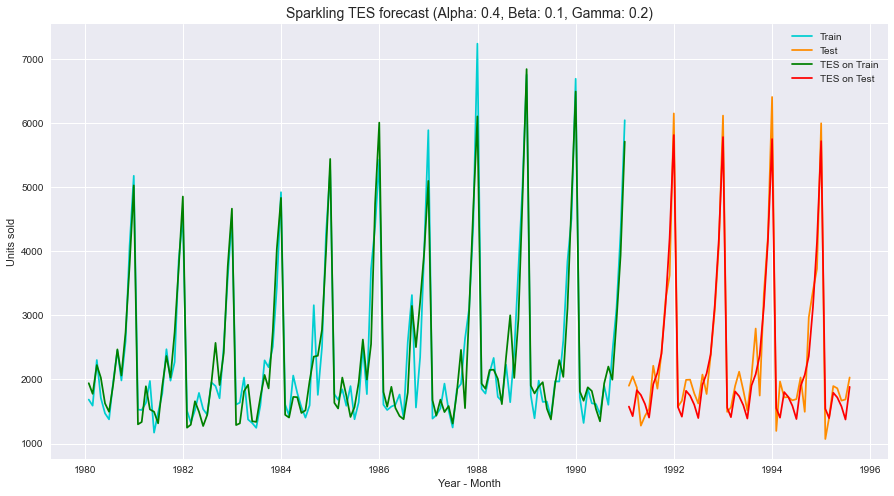

In [128]:
#plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

###### Attempt Autofit of TES

In [129]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [130]:
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [132]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [133]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

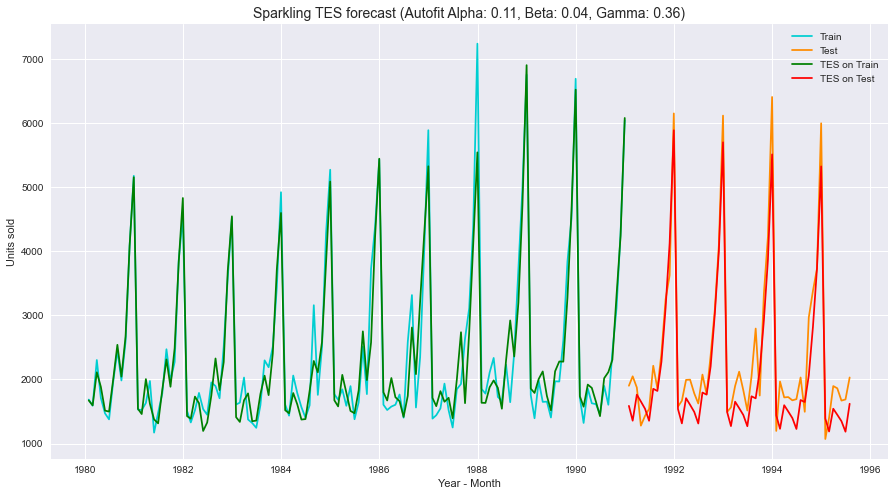

In [134]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.04, Gamma: 0.36)', fontsize=14)

plt.legend(loc='best')

In [135]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [136]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
30     0.1   0.4    0.1  400.768319       11.48  331.257015      10.54

In [137]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE   Test RMSE  Test MAPE
137    0.2   0.4    0.8  469.644813       13.45  336.712085       9.98
402    0.5   0.1    0.3  390.175608       11.54  325.544937       9.99
300    0.4   0.1    0.1  370.612639       11.03  318.103496      10.01
211    0.3   0.2    0.2  377.777799       11.26  314.906684      10.10
301    0.4   0.1    0.2  374.619861       11.24  315.935531      10.45

In [138]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049607360581862936         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93

In [139]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049607360581862936         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

#### Plot all above models

Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

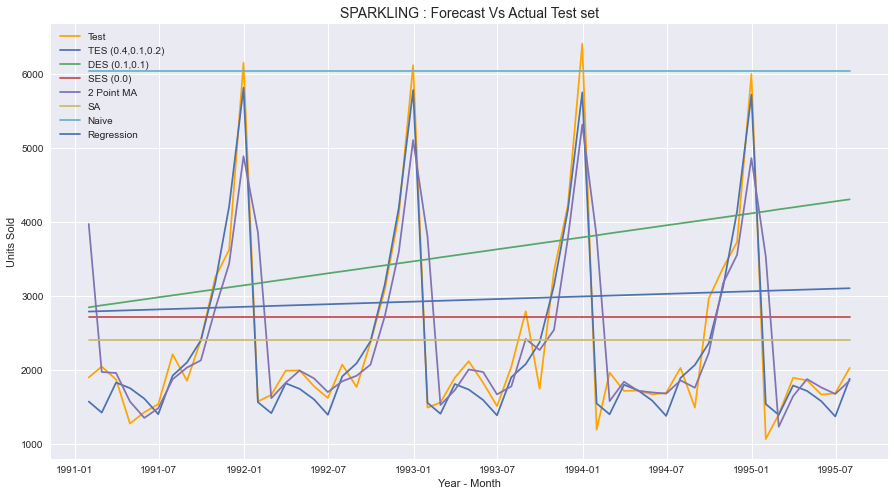

In [140]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)

## ARIMA Models

#### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [141]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

#### Sparkling

Original series

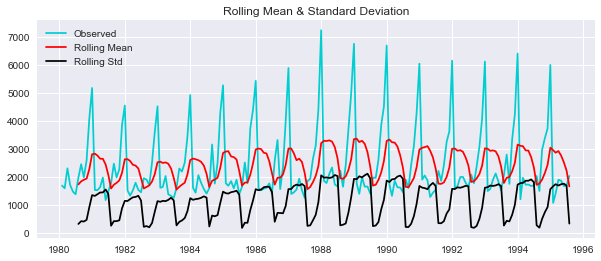

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [143]:
plt.figure(figsize=(10,4))
test_stationarity(df_spark['Sparkling'],'darkturquoise')

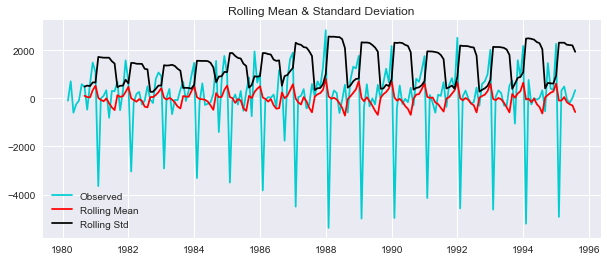

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [144]:
plt.figure(figsize=(10,4))
test_stationarity(df_spark['Sparkling'].diff().dropna(),'darkturquoise')

We see that at 5% significant level the Time Series is non-stationary. But the seasonality is multiplicative as the Std deviation and mean varies according to the change in trend

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

Difference of original series

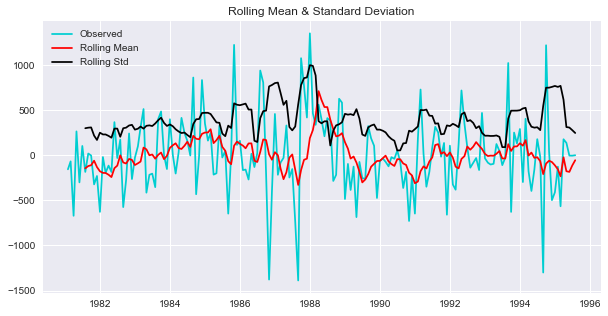

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [145]:
plt.figure(figsize=(10,5))
test_stationarity(df_spark['Sparkling'].diff(12).dropna(), 'darkturquoise')

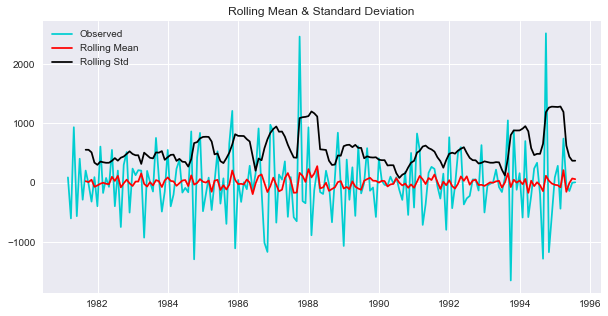

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [146]:
plt.figure(figsize=(10,5))
test_stationarity((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

We see that at  = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative

Log of series

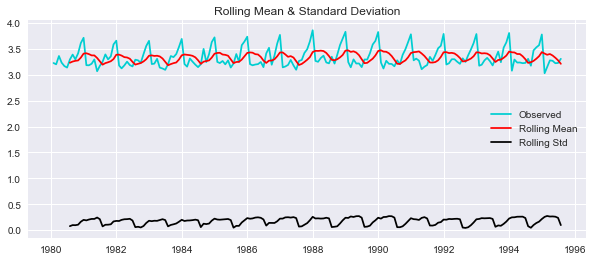

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [147]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_spark['Sparkling']), 'darkturquoise')

Seasonality is now additive but non stationary

Difference of log of series

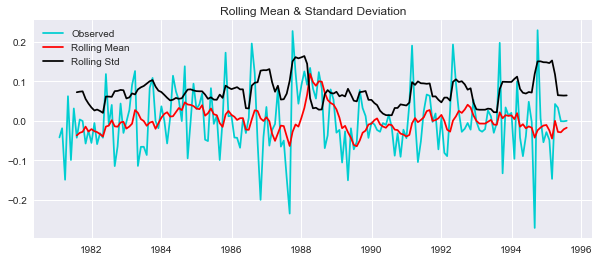

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [148]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_spark['Sparkling']).diff(12).dropna(),  'darkturquoise')

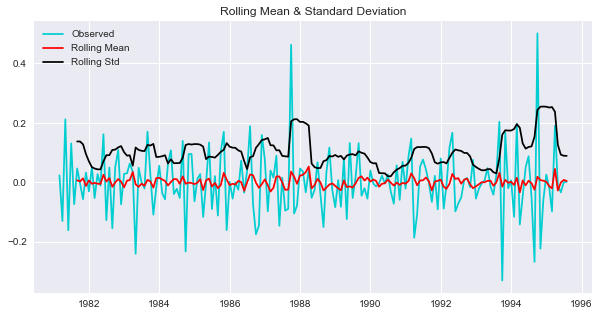

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [149]:
plt.figure(figsize=(10,5))
test_stationarity((np.log10(df_spark['Sparkling']).diff(12).dropna()).diff().dropna(),  'darkturquoise')

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [150]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##### ACF Plots

<Figure size 720x360 with 0 Axes>

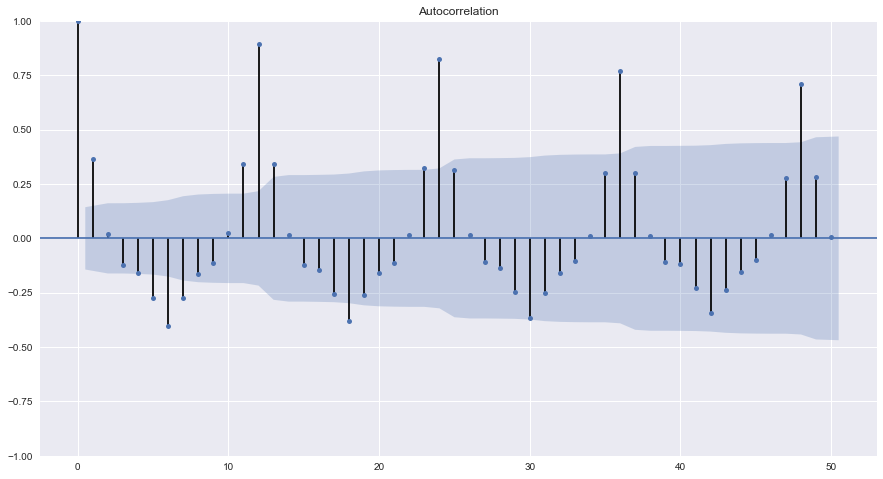

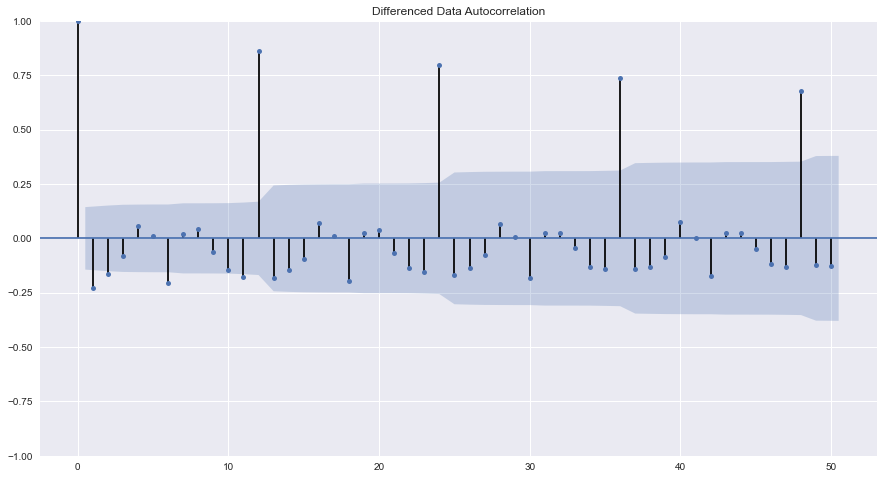

In [151]:
plt.figure(figsize=(10,5))
plot_acf(df_spark['Sparkling'],lags=50)
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

##### PACF Plots

<Figure size 720x360 with 0 Axes>

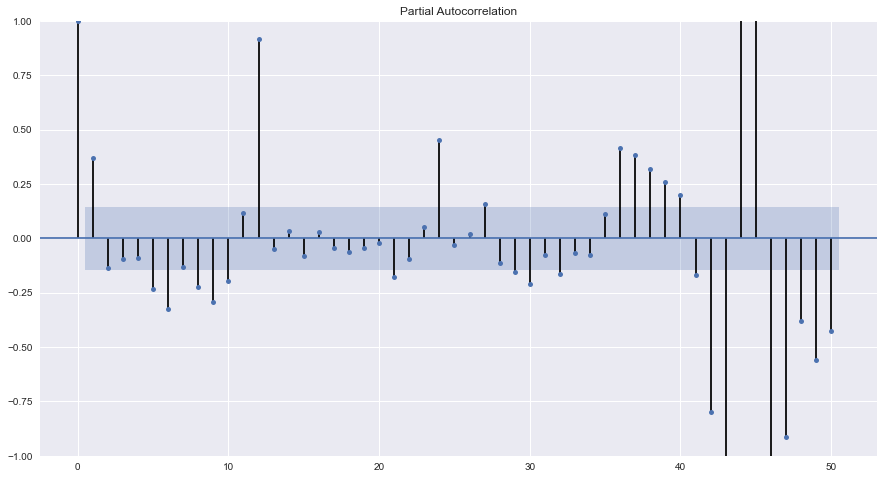

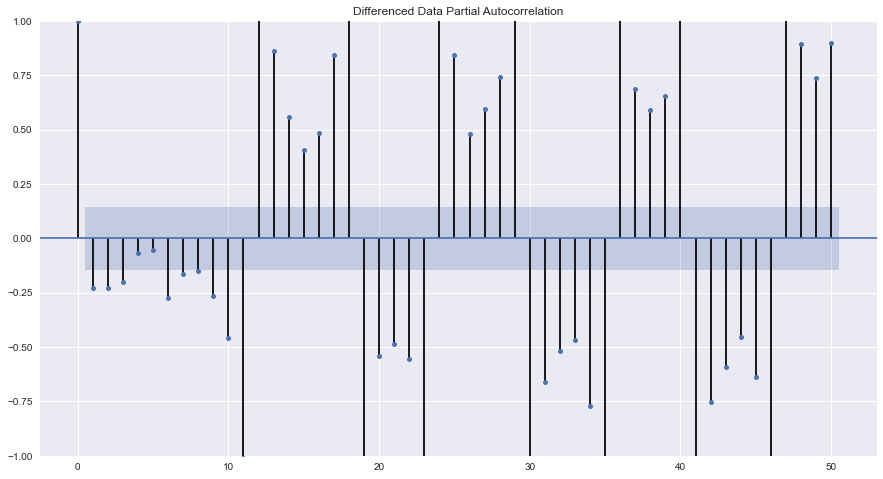

In [153]:
plt.figure(figsize=(10,5))
plot_pacf(df_spark['Sparkling'],lags=50)
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

#### Model 8: SARIMA

In [200]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

#### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

###### AUTO SARIMA on original data

In [201]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [202]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
import statsmodels.api as sm

In [203]:
for param in pdq:
    for param_seasonal in model_pdq1:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 6)7 - AIC:2262.9835238897754
SARIMA(0, 1, 0)x(0, 1, 1, 6)7 - AIC:2018.7784206922179
SARIMA(0, 1, 0)x(0, 1, 2, 6)7 - AIC:1859.2938415854858
SARIMA(0, 1, 0)x(0, 1, 3, 6)7 - AIC:1719.4211330300438
SARIMA(0, 1, 0)x(1, 1, 0, 6)7 - AIC:1838.4913791966646
SARIMA(0, 1, 0)x(1, 1, 1, 6)7 - AIC:1825.5404759866062
SARIMA(0, 1, 0)x(1, 1, 2, 6)7 - AIC:1717.6099198659394
SARIMA(0, 1, 0)x(1, 1, 3, 6)7 - AIC:1633.4524588992288
SARIMA(0, 1, 0)x(2, 1, 0, 6)7 - AIC:1747.667172288274
SARIMA(0, 1, 0)x(2, 1, 1, 6)7 - AIC:1746.2224663334239
SARIMA(0, 1, 0)x(2, 1, 2, 6)7 - AIC:1719.0964203387048
SARIMA(0, 1, 0)x(2, 1, 3, 6)7 - AIC:1638.298103710282
SARIMA(0, 1, 0)x(3, 1, 0, 6)7 - AIC:1650.1672596141539
SARIMA(0, 1, 0)x(3, 1, 1, 6)7 - AIC:1649.7725204011751
SARIMA(0, 1, 0)x(3, 1, 2, 6)7 - AIC:1651.1216668708917
SARIMA(0, 1, 0)x(3, 1, 3, 6)7 - AIC:1639.031259042135
SARIMA(0, 1, 1)x(0, 1, 0, 6)7 - AIC:2243.355144109237
SARIMA(0, 1, 1)x(0, 1, 1, 6)7 - AIC:1999.5210480233047
SARIMA(0, 1, 1

SARIMA(2, 1, 1)x(1, 1, 2, 6)7 - AIC:1656.5933338323164
SARIMA(2, 1, 1)x(1, 1, 3, 6)7 - AIC:1574.067181295686
SARIMA(2, 1, 1)x(2, 1, 0, 6)7 - AIC:1674.764863708867
SARIMA(2, 1, 1)x(2, 1, 1, 6)7 - AIC:1676.748012249209
SARIMA(2, 1, 1)x(2, 1, 2, 6)7 - AIC:1658.3946049594886
SARIMA(2, 1, 1)x(2, 1, 3, 6)7 - AIC:1575.9467521208423
SARIMA(2, 1, 1)x(3, 1, 0, 6)7 - AIC:1577.7924484726127
SARIMA(2, 1, 1)x(3, 1, 1, 6)7 - AIC:1575.9180151143355
SARIMA(2, 1, 1)x(3, 1, 2, 6)7 - AIC:1575.1479770062601
SARIMA(2, 1, 1)x(3, 1, 3, 6)7 - AIC:1577.1678107003797
SARIMA(2, 1, 2)x(0, 1, 0, 6)7 - AIC:2165.2336560767417
SARIMA(2, 1, 2)x(0, 1, 1, 6)7 - AIC:1964.4774339480878
SARIMA(2, 1, 2)x(0, 1, 2, 6)7 - AIC:1789.9555880506714
SARIMA(2, 1, 2)x(0, 1, 3, 6)7 - AIC:1679.5106356179087
SARIMA(2, 1, 2)x(1, 1, 0, 6)7 - AIC:1758.5373540114379
SARIMA(2, 1, 2)x(1, 1, 1, 6)7 - AIC:1745.9063468279435
SARIMA(2, 1, 2)x(1, 1, 2, 6)7 - AIC:1642.514530695792
SARIMA(2, 1, 2)x(1, 1, 3, 6)7 - AIC:1559.7159595257147
SARIMA(2, 1, 2

In [204]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param      seasonal          AIC
183  (2, 1, 3)  (1, 1, 3, 6)  1538.974356
247  (3, 1, 3)  (1, 1, 3, 6)  1543.202992
191  (2, 1, 3)  (3, 1, 3, 6)  1543.416154
251  (3, 1, 3)  (2, 1, 3, 6)  1543.586534
55   (0, 1, 3)  (1, 1, 3, 6)  1543.929506

In [207]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(2, 1, 3),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(1, 1, 3, 6)   Log Likelihood                -759.487
Date:                           Tue, 01 Feb 2022   AIC                           1538.974
Time:                                   19:47:00   BIC                           1565.322
Sample:                                        0   HQIC                          1549.646
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7451      0.067    -26.143      0.000      -1.876      -1.614
ar.L2         -0.7880      0.072    -11.019

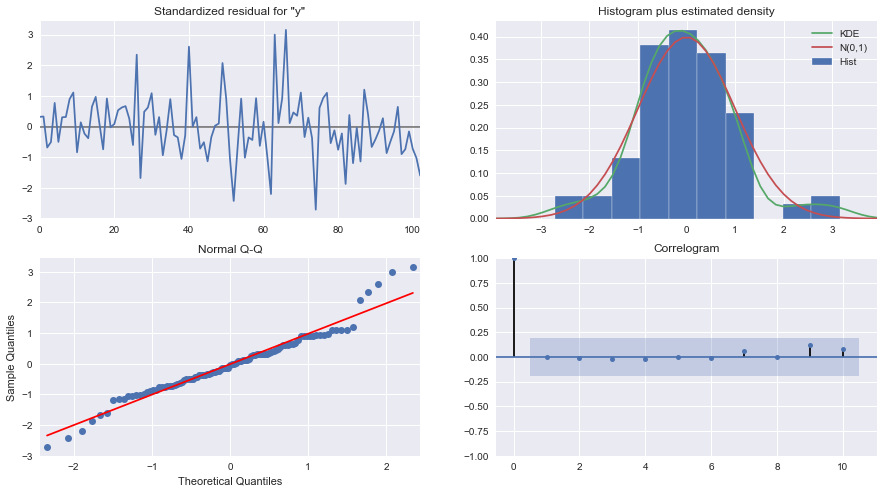

In [208]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [209]:
SARIMA_test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [210]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [211]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [212]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1402.916471  375.414650     667.117278    2138.715663
1  1006.539044  393.177745     235.924825    1777.153263
2  1705.854083  393.624213     934.364801    2477.343364
3  1593.383271  404.016382     801.525713    2385.240829
4  1154.292052  404.065652     362.337927    1946.246177

In [213]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
Time_Stamp                             
1991-01-31       1902       1402.916471
1991-02-28       2049       1006.539044
1991-03-31       1874       1705.854083
1991-04-30       1279       1593.383271
1991-05-31       1432       1154.292052

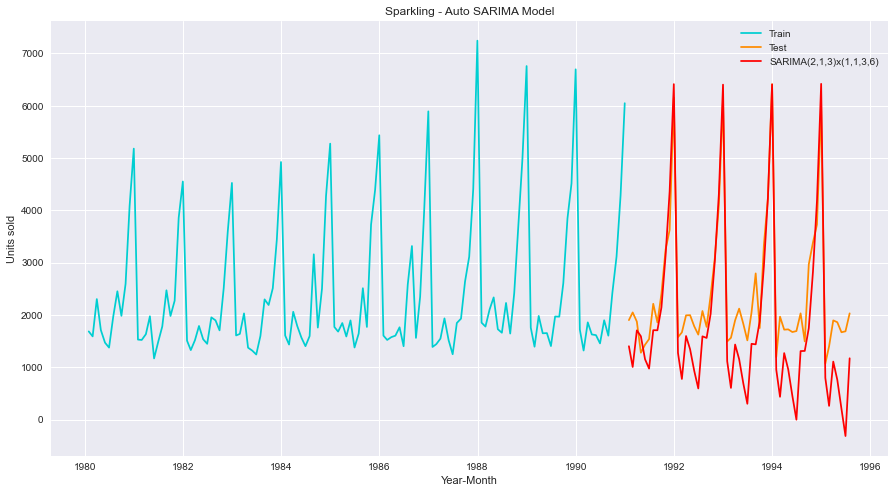

In [214]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(2,1,3)x(1,1,3,6)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [215]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 789.940 and MAPE is 26.75


In [216]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049607360581862936         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)           789.939859      26.75

###### AUTO SARIMA on Log

In [217]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

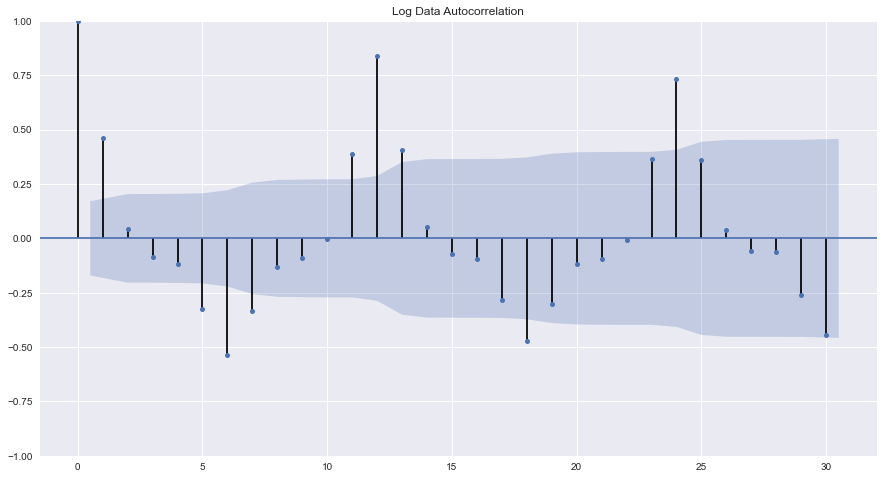

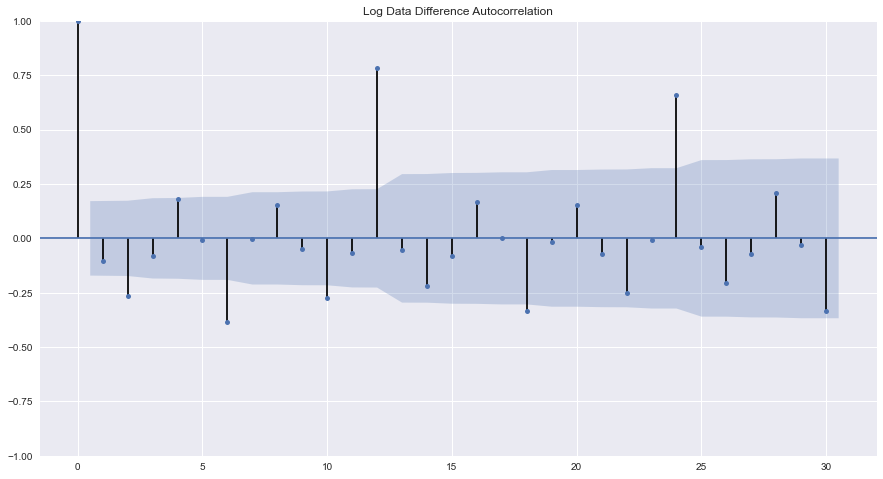

In [218]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

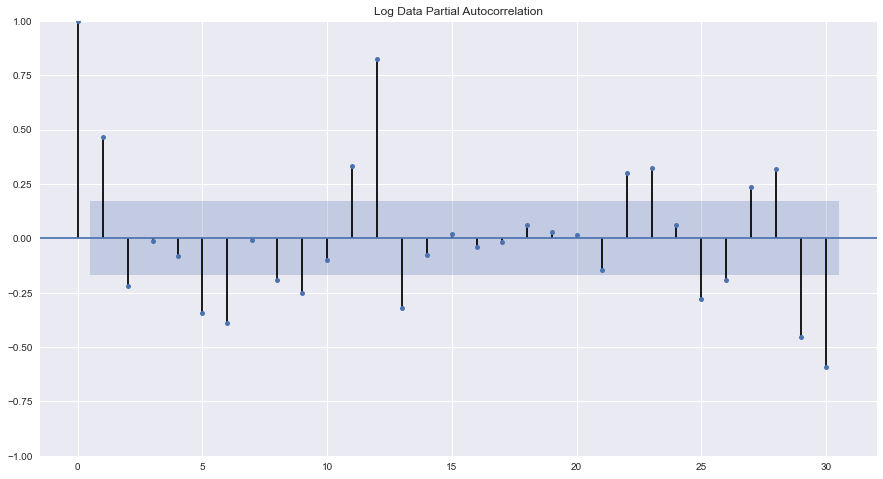

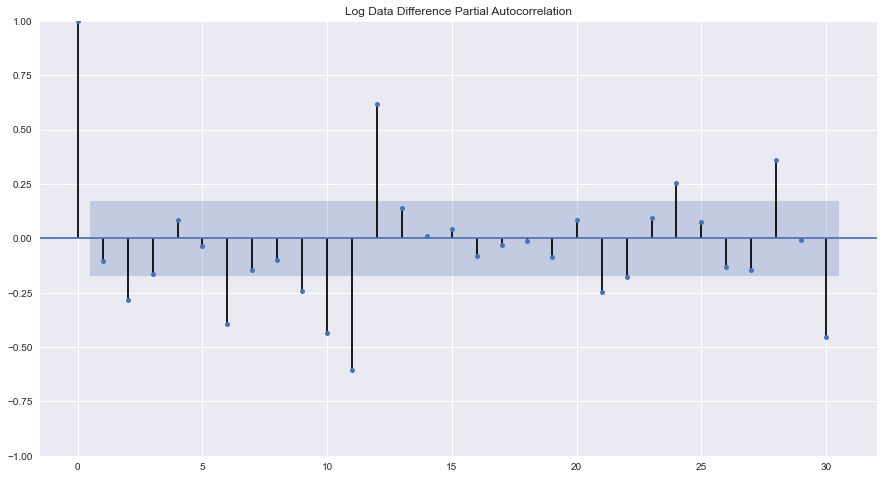

In [219]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

In [220]:
# We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [221]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [222]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [223]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.22316326227245
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.8182946997844
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597538
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064502657775
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.21040818296578
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378277663962
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.1904718472119
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.41328546183834
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913589961724
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576096902735
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.28892582961413
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.15491722200653
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.30580314050408
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900277954526
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797543082524
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566704086213
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - A

SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.7150470163418
SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168143797222
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.60373956652523
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.5966637246678
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.8980350617291
SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087476676486
SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.88020542103084
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40944556263977
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33411838527496
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985256315684
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22802545218096
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.9603262314655
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.6535871099294
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.10199089644675
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.45849390047468
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383224335645
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.1488741434819


In [224]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517330
43   (0, 1, 2)  (1, 0, 1, 12) -281.567996
97   (1, 1, 2)  (1, 0, 1, 12) -279.611701
133  (2, 1, 1)  (1, 0, 1, 12) -278.288232

In [225]:
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Tue, 01 Feb 2022   AIC                           -284.472
Time:                                    20:00:59   BIC                           -273.423
Sample:                                01-31-1980   HQIC                          -279.986
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.863      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

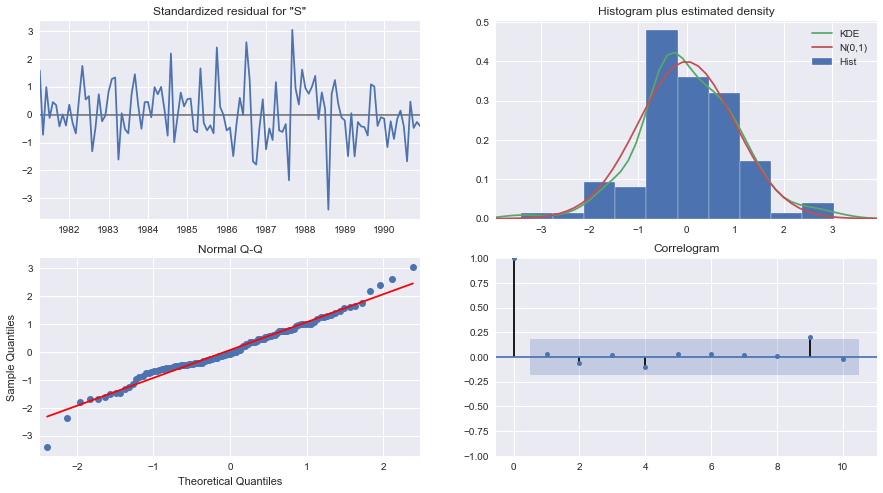

In [226]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

###### Predict on the Test Set using this model

In [227]:
SARIMA_test.head()

Sparkling  spark_forecasted
Time_Stamp                             
1991-01-31       1902       1402.916471
1991-02-28       2049       1006.539044
1991-03-31       1874       1705.854083
1991-04-30       1279       1593.383271
1991-05-31       1432       1154.292052

In [228]:
pred_dynamic = results_auto_SARIMA_spark_log.get_prediction(dynamic=True, full_results=True)

In [229]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.1)

In [230]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  3.212033  0.067108       3.080503       3.343562
1991-02-28  3.141308  0.067465       3.009080       3.273537
1991-03-31  3.256287  0.067821       3.123361       3.389213
1991-04-30  3.226733  0.068174       3.093114       3.360353
1991-05-31  3.195789  0.068527       3.061479       3.330099

In [231]:
# Extract the predicted and true values of our time series
spark_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['spark_log_forecasted'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted
Time_Stamp                                                   
1991-01-31       1902       1402.916471           1629.418664
1991-02-28       2049       1006.539044           1384.549093
1991-03-31       1874       1705.854083           1804.208809
1991-04-30       1279       1593.383271           1685.516569
1991-05-31       1432       1154.292052           1569.599978

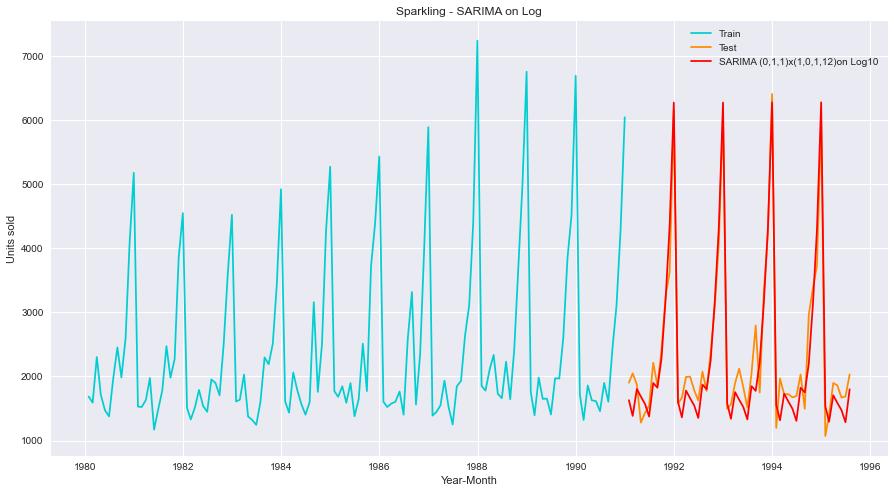

In [232]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_log_forecasted'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best')

In [233]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_log_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_log_forecasted'])
print("For SARIMA log forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA log forecast on the Sparkling Testing Data:  RMSE is 336.799 and MAPE is 11.19


In [234]:
resultsDf_8_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(0,1,1)x(1,0,1,12)-Log10'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark2])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049607360581862936         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)           789.939859      26.75
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.799059      11.19

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

###### Manual SARIMA
Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

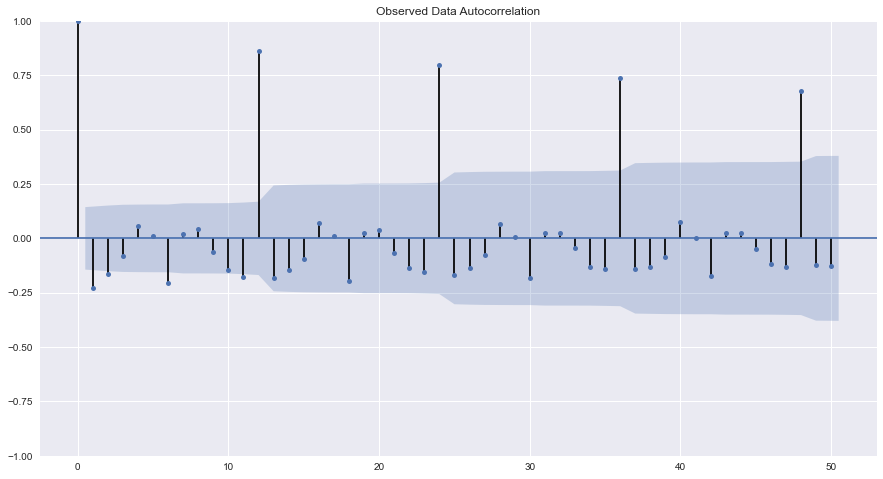

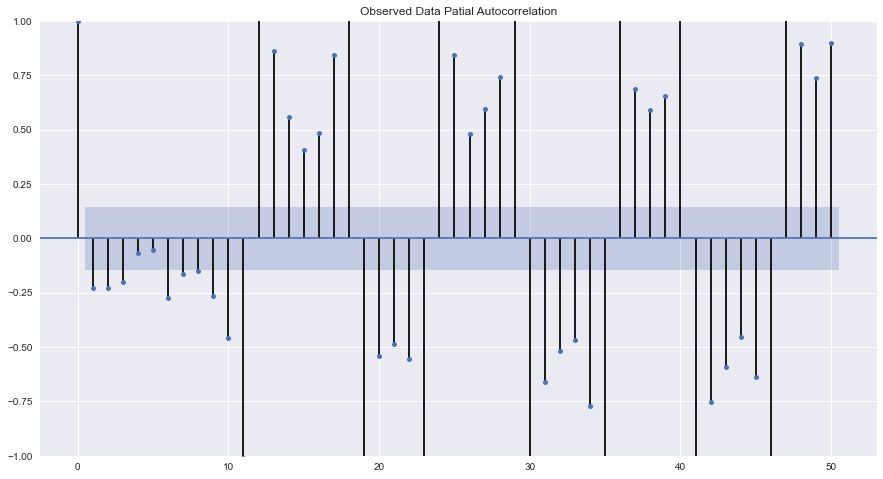

In [236]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

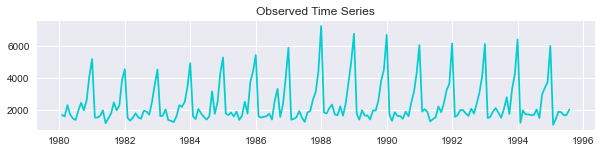

In [237]:
plt.figure(figsize=(10,2))
plt.plot(df_spark['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.

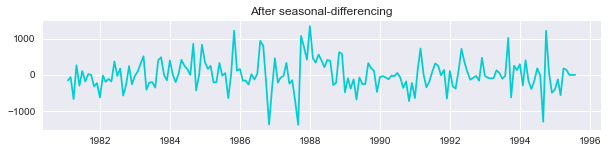

In [238]:
plt.figure(figsize=(10,2))
plt.plot(df_spark['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

The marginal trend in the data is still seen

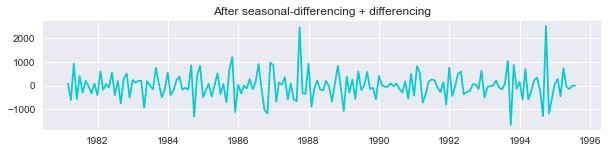

In [239]:
plt.figure(figsize=(10,2))
plt.plot((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

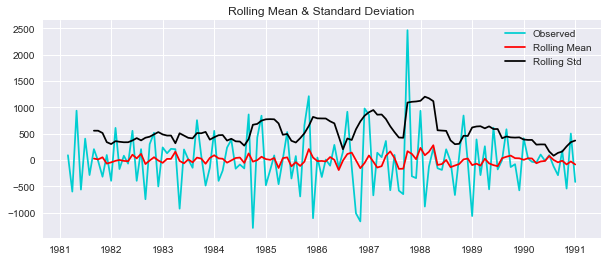

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [240]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'darkturquoise')

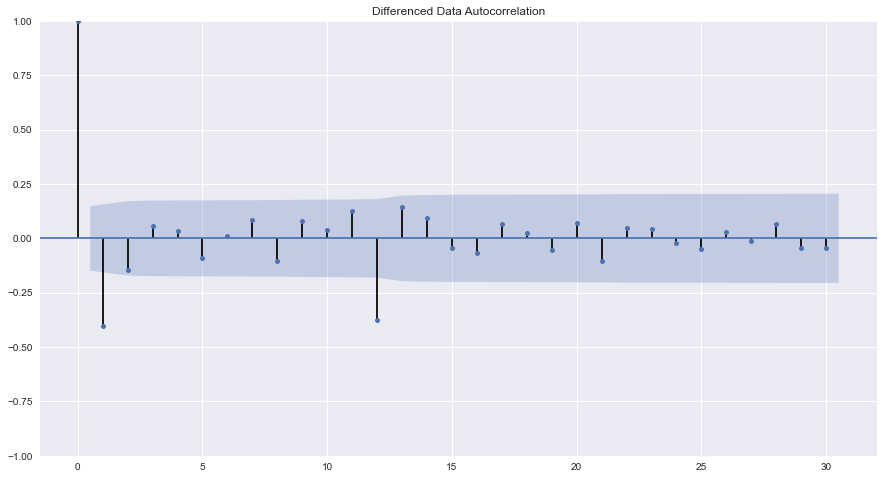

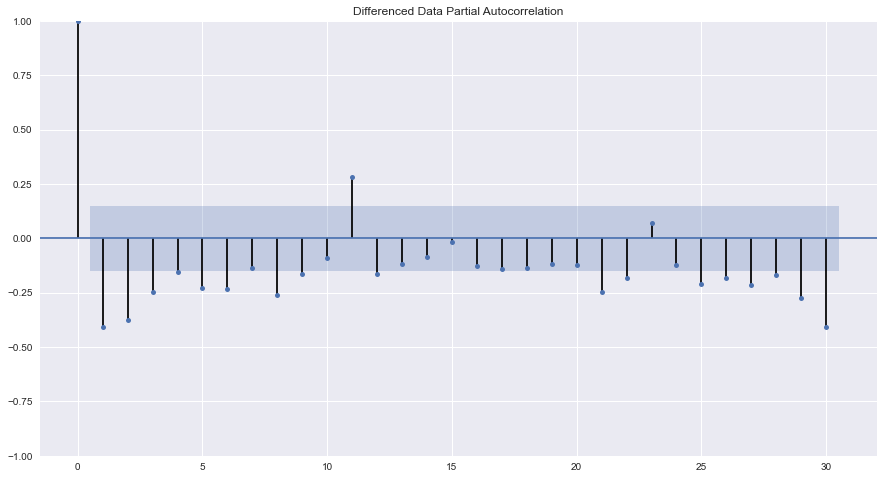

In [241]:
plot_acf((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [242]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 01 Feb 2022   AIC                           1403.394
Time:                                         20:17:05   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

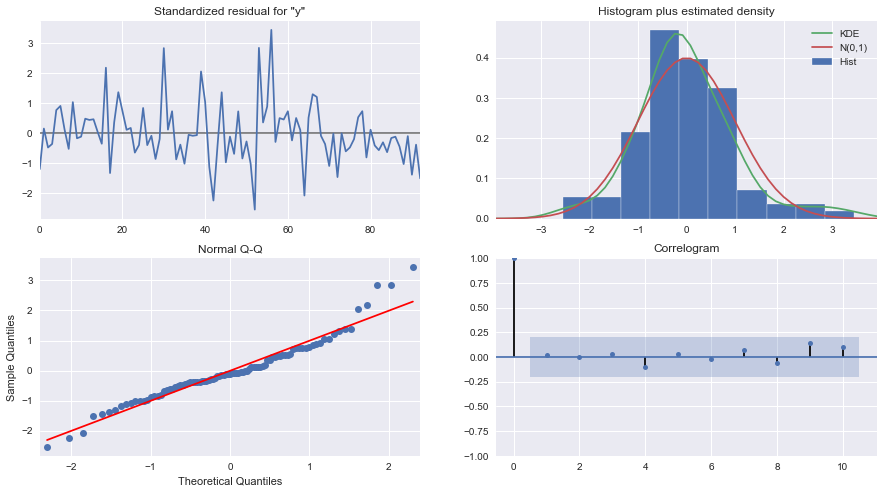

In [243]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

In [244]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [245]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [246]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.909525  416.594338     763.399626    2396.419423
1  1419.153441  429.113691     578.106061    2260.200820
2  1868.142987  429.104332    1027.113950    2709.172025
3  1731.471376  430.973026     886.779766    2576.162986
4  1659.821743  431.906018     813.301503    2506.341984

In [247]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_log_forecasted  \
Time_Stamp                                                      
1991-01-31       1902       1402.916471           1629.418664   
1991-02-28       2049       1006.539044           1384.549093   
1991-03-31       1874       1705.854083           1804.208809   
1991-04-30       1279       1593.383271           1685.516569   
1991-05-31       1432       1154.292052           1569.599978   

            spark_manual_forecasted  
Time_Stamp                           
1991-01-31              1579.909525  
1991-02-28              1419.153441  
1991-03-31              1868.142987  
1991-04-30              1731.471376  
1991-05-31              1659.821743

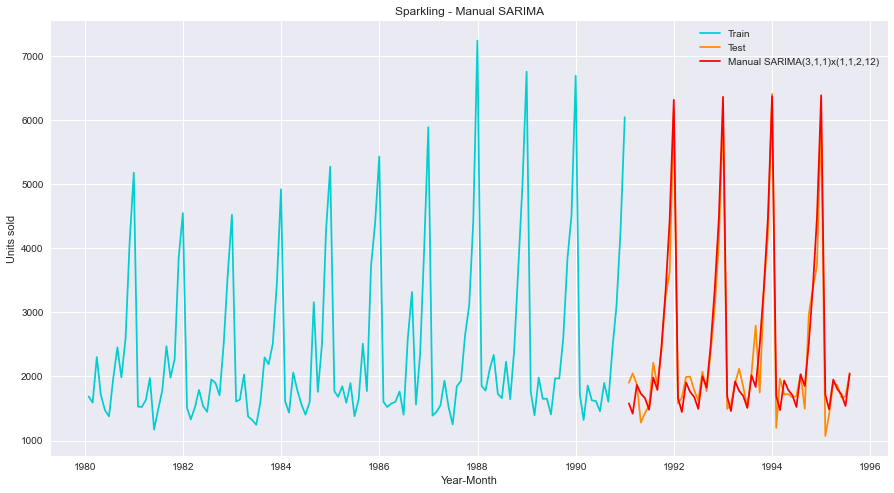

In [248]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [249]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For manual SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For manual SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.107 and MAPE is 9.48


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [250]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       1389.135175      50.15
NaiveModel                             3864.279352     152.87
SimpleAverage                          1275.081804      38.90
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
6 point TMA                            1283.927428      43.86
9 point TMA                            1346.278315      46.86
SES Alpha 0.049607360581862936         1316.035487      45.47
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)           789.939859      26.75
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.799059      11.19
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

###### Building the most optimum model on the Full Data.

###### Sparkling
Sort the results from all the models

In [251]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.799059      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
Auto SARIMA(3,1,3)x(3,1,0,12)           789.939859      26.75
2 point TMA                             813.400684      19.70
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049607360581862936         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

In [252]:
spark_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
Manual SARIMA(3,1,1)x(1,1,2,12)         324.106510       9.48
TES Alpha 0.4, Beta 0.1, Gamma 0.2      315.935531      10.45
Auto SARIMA(0,1,1)x(1,0,1,12)-Log10     336.799059      11.19
TES Alpha 0.15, Beta 0.00, Gamma 0.37   404.286809      13.93
2 point TMA                             813.400684      19.70
Auto SARIMA(3,1,3)x(3,1,0,12)           789.939859      26.75
4 point TMA                            1156.589694      35.96
SimpleAverage                          1275.081804      38.90
6 point TMA                            1283.927428      43.86
SES Alpha 0.049607360581862936         1316.035487      45.47
9 point TMA                            1346.278315      46.86
RegressionOnTime                       1389.135175      50.15
DES Alpha 0.1,Beta 0.1                 1779.420000      67.23
DES Alpha 0.6,Beta 0.0                 2007.238526      68.23
NaiveModel                             3864.279352     152.87

###### Plot all the forecast

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

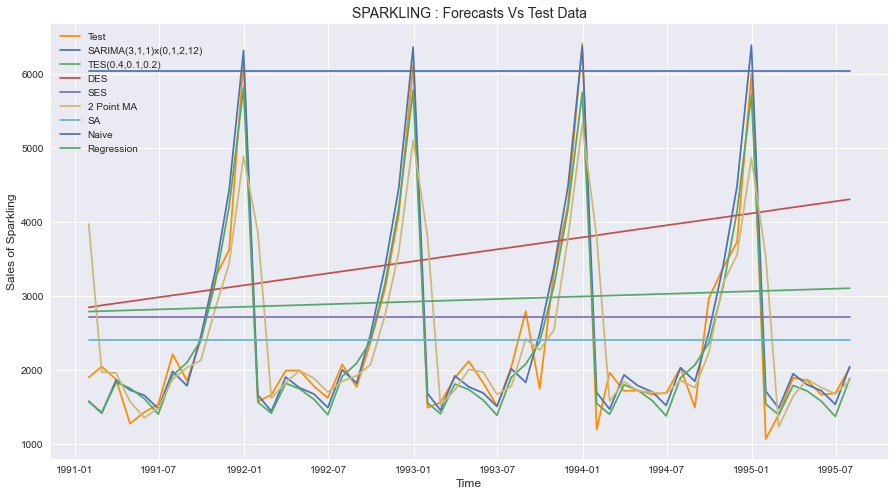

In [255]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'purple')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_manual_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

Build model on all of the dataset using best model, which is TES

In [256]:
model_TES_spark = ExponentialSmoothing(df_spark['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [258]:
rmse_spark_tes_full = metrics.mean_squared_error(df_spark['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df_spark['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.775 and MAPE is 11.29


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

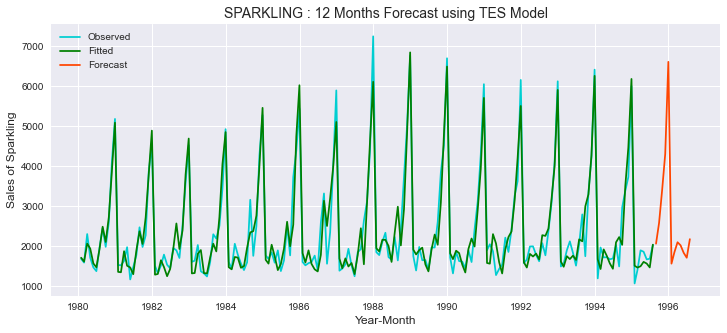

In [259]:
plt.figure(figsize=(12,5))

plt.plot(df_spark['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

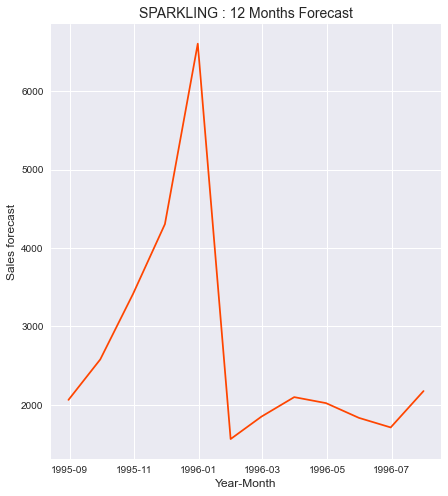

In [260]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

###### Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast

In [262]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df_spark['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Tue, 01 Feb 2022   AIC                           2176.875
Time:                                         20:31:20   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4229      0.086     -4.917      0.000      -0.591      -0

In [263]:
rcParams['figure.figsize'] = 14,7

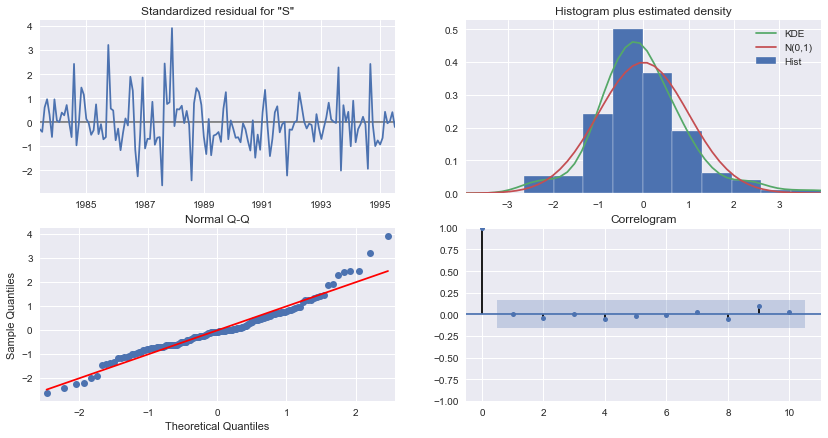

In [264]:
results_full_data_model_spark.plot_diagnostics();

In [265]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [266]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.543034  384.404018    1120.125004    2626.961064
1995-09-30  2444.931235  389.417467    1681.687025    3208.175446
1995-10-31  3312.891720  390.110811    2548.288580    4077.494860
1995-11-30  3994.799419  390.618837    3229.200566    4760.398272
1995-12-31  6084.234032  390.748039    5318.381948    6850.086116

In [269]:
rmse_spark_sarima_full = metrics.mean_squared_error(df_spark['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df_spark['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.263 and MAPE is 14.86


In [270]:
df_spark.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [271]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

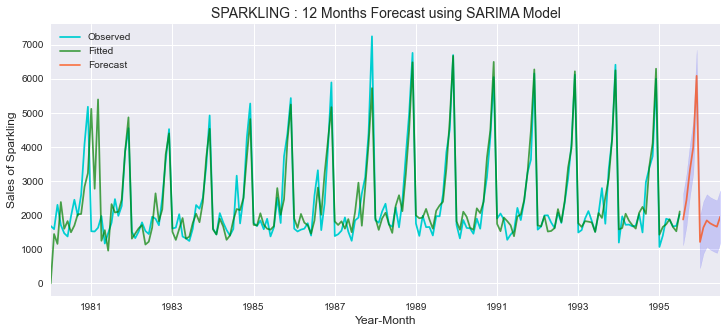

In [272]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df_spark['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

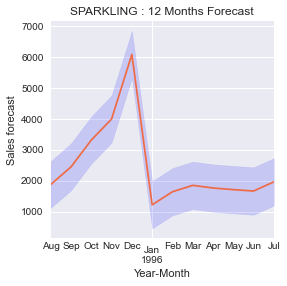

In [273]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [274]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.54
1995-09-30    2444.93
1995-10-31    3312.89
1995-11-30    3994.80
1995-12-31    6084.23
1996-01-31    1216.32
1996-02-29    1640.83
1996-03-31    1847.30
1996-04-30    1762.21
1996-05-31    1708.57
1996-06-30    1664.03
1996-07-31    1961.43

In [275]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.256667
std    1384.626967
min    1216.320000
25%    1697.435000
50%    1860.420000
75%    2661.920000
max    6084.230000